In [1]:
install.packages("BiocManager")
BiocManager::install("DESeq2")
install.packages("pheatmap")
library("DESeq2")
library("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


Old packages: 'backports', 'memoise', 'openssl', 'nlme'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

L

In [9]:
# команды через ! работают только в юпитерском питоне, а вот в юпитерском аре нет
system("git clone https://github.com/Cortan122/hse21_hw3.git")
setwd("hse21_hw3/data") # это cd

In [14]:
info = read.table("ALL.info", header=TRUE, row.names="sample")
counts = as.matrix(read.table("ALL.counts", header=TRUE, row.names="gene"))

dds = DESeqDataSetFromMatrix(countData=counts, colData=info, design=~condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [16]:
head(counts)
head(info)

,c1,c2,c3,r1,r2,r3
ENSMUSG00000000001.4,3431,3504,4031,4489,3919,5700
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,150,136,152,345,273,468
ENSMUSG00000000031.16,55526,48225,56064,64504,33249,64992
ENSMUSG00000000037.17,41,44,52,77,68,87
ENSMUSG00000000049.11,10,8,10,4,1,1


,id,condition
,<chr>,<chr>
c1,SRR3414635,control
c2,SRR3414636,control
c3,SRR3414637,control
r1,SRR3414629,reprogramming
r2,SRR3414630,reprogramming
r3,SRR3414631,reprogramming


In [17]:
dds$condition = relevel(dds$condition, ref="control")
dds = DESeq(dds)
res = results(dds, alpha=0.01)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



## Строим тепловую карту

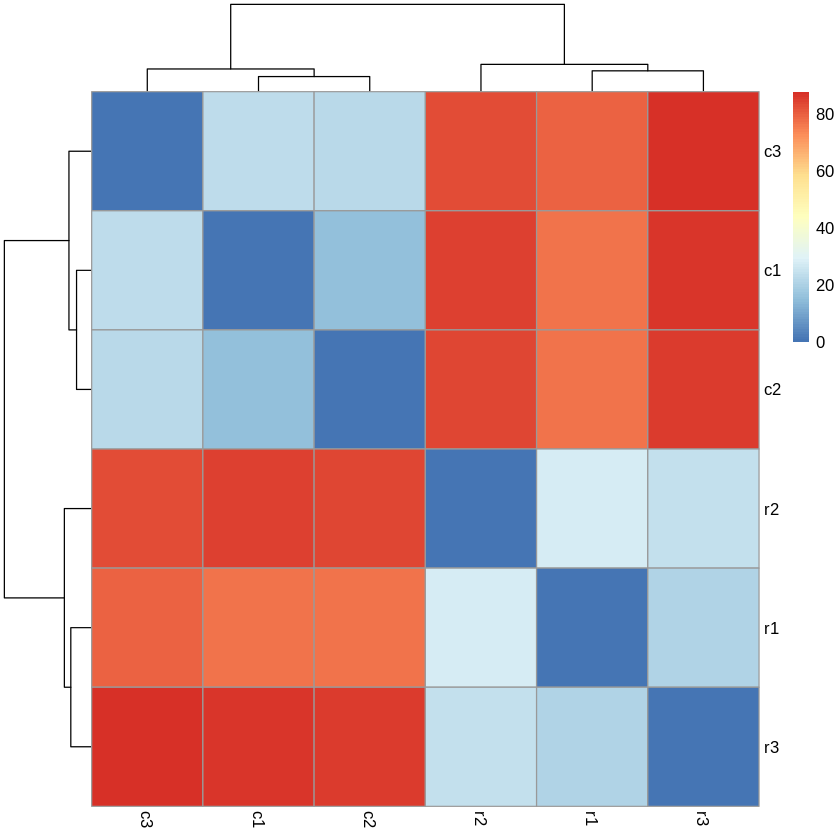

In [18]:
rld = rlog(dds)
sampleDists = dist(t(assay(rld)))
sampleDistMatrix = as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)

## Рисуем MA график

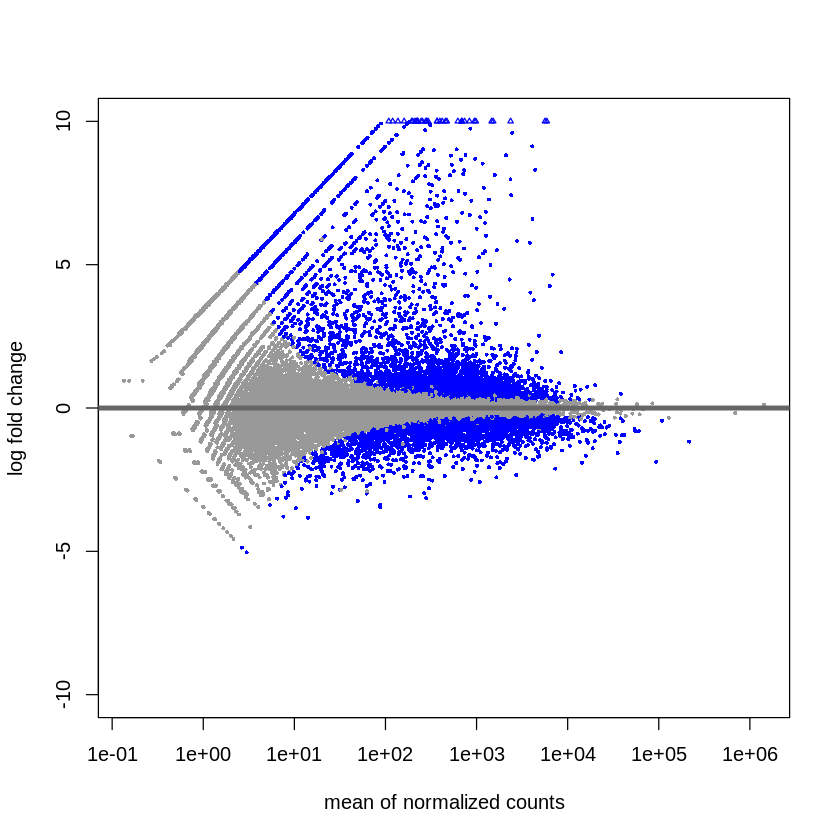

In [19]:
plotMA(res, ylim=c(-10,10))

## Ищем самые важные гены

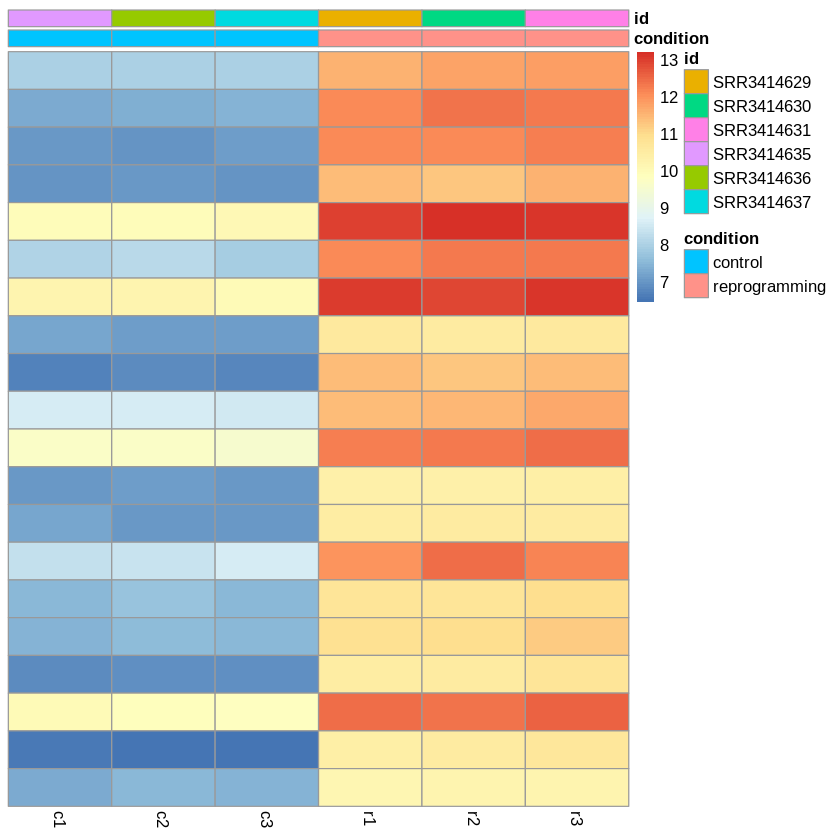

In [41]:
# это строчка находит индексы 20ти самых важных генов
# щя обясню:
# 1) $padj достаёт из датафрейма колонку с adjusted pvalue
# 2) функция order() возвращяет индексы такие, что если взять по ним елементы,
#    то масив будет отсортирован, как np.argsort в питоне
# 3) [1:20] берёт первые 20 этих индексов, как [0:20] в питоне,
#    потому что в аре индексы с единицы
select = order(res$padj)[1:20]

# рисуем красивую картинку
df = as.data.frame(colData(dds)[,c("condition", "id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE, cluster_cols=FALSE, annotation_col=df)

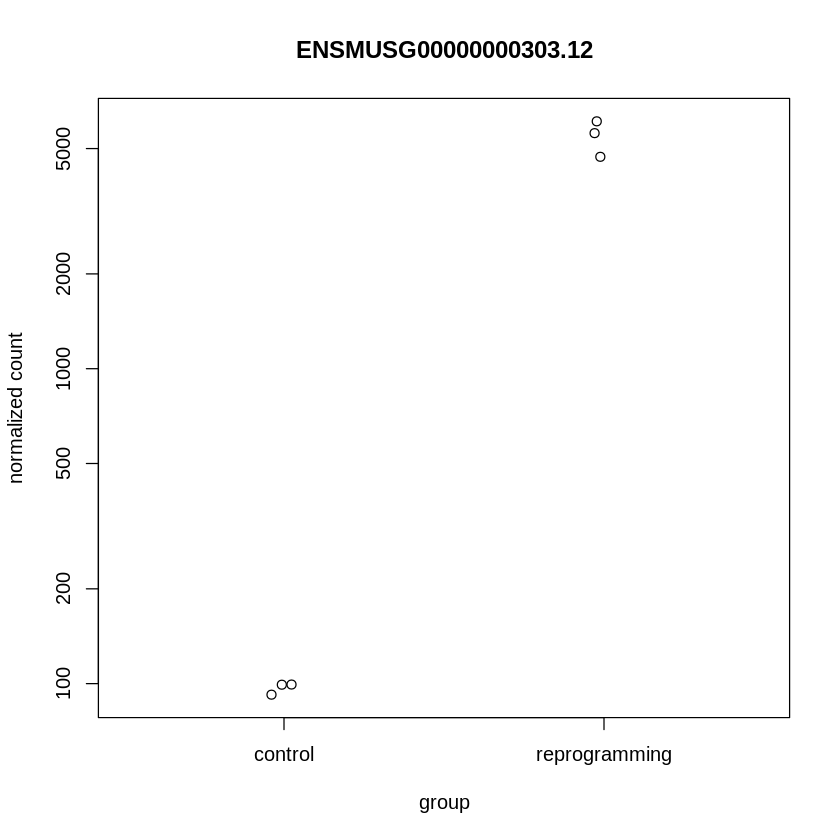

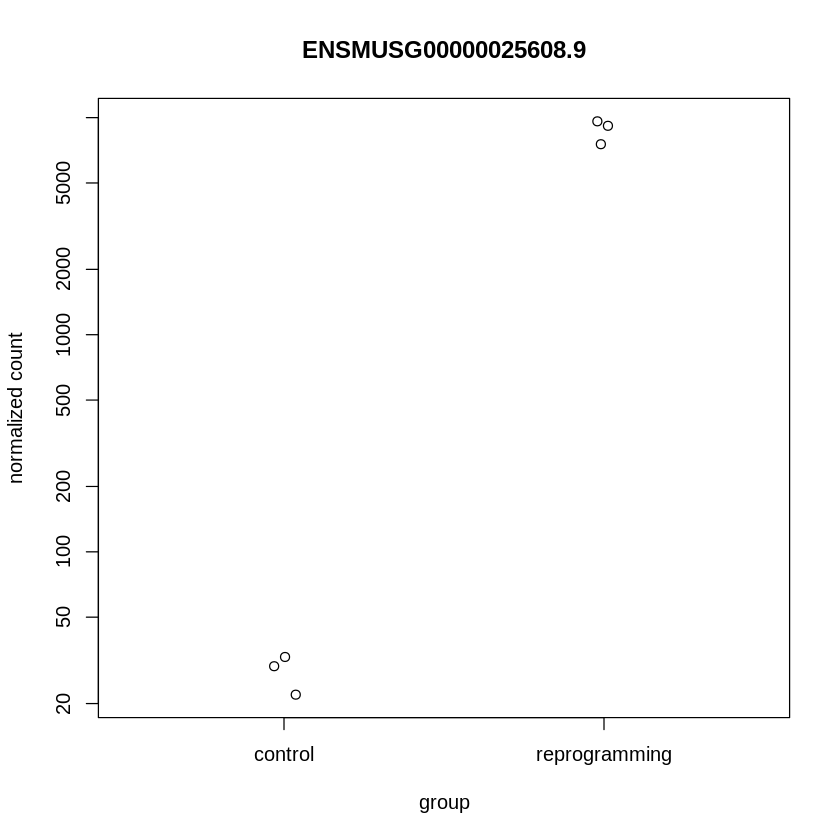

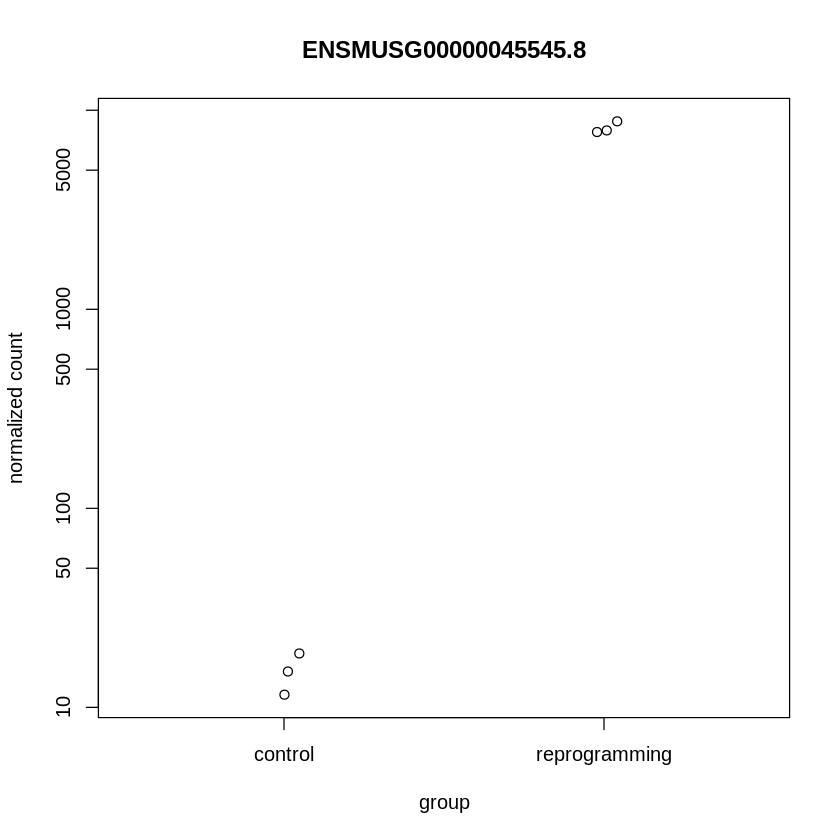

In [45]:
plotCounts(dds, gene=select[1], intgroup="condition")
plotCounts(dds, gene=select[2], intgroup="condition")
plotCounts(dds, gene=select[3], intgroup="condition")

## Записываем результаты в таблицу

In [46]:
resOrdered = res[order(res$padj),]
resSignificant = subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote=FALSE)